In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sxmreader import SXMReader
import pySPM as spm
import os
from skimage.filters import difference_of_gaussians as dog
from scipy import fftpack
%matplotlib inline

In [37]:
data = SXMReader(['electromigration_22/Image_533.sxm'], channel='Bias')

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

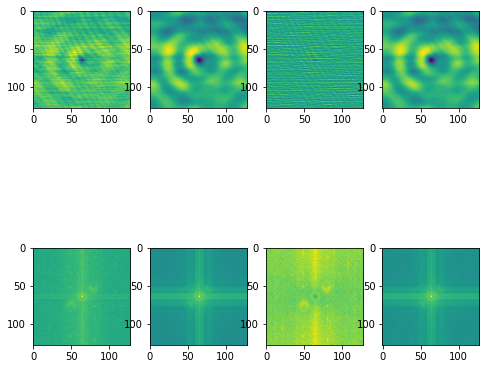

In [140]:
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter, laplace
f = np.fft.fft2(data[0])
fshift = np.fft.fftshift(f)
filtered = gaussian_filter(data[0], sigma=2.7)
filt_f = np.fft.fft2(filtered)
filt_fshift = np.fft.fftshift(filt_f)
high_freq = data[0] - gaussian_filter(data[0], sigma=0.3)
high_freq_f = np.fft.fft2(high_freq)
high_fshift = np.fft.fftshift(high_freq_f)
composite = high_freq + filtered
composite_f = np.fft.fft2(composite)
composite_fshift = np.fft.fftshift(composite_f)
f, axs = plt.subplots(2, 4)
f.set_figheight(8)
f.set_figwidth(8)
axs[0, 0].imshow(data[0])
axs[0, 1].imshow(filtered)
axs[0, 2].imshow(high_freq)
axs[0, 3].imshow(composite)
axs[1, 0].imshow(np.abs(fshift), norm=LogNorm(vmin=1e-12))
axs[1, 1].imshow(np.abs(filt_fshift), norm=LogNorm(vmin=1e-12))
axs[1, 2].imshow(np.abs(high_fshift), norm=LogNorm(vmin=1e-12))
axs[1, 3].imshow(np.abs(composite_fshift), norm=LogNorm(vmin=1e-12))